In [ ]:
import glob
import cv2
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
categories = ['daisy','dandelion','rose','sunflower','tulip']

In [ ]:
daisy = [cv2.imread(daisy) for daisy in glob.glob('/mnt/c/Users/Ashwin/Documents/Ash/Projects/DL/Data/flowers/daisy/*jpg')]
dandelion = [cv2.imread(daisy) for daisy in glob.glob('/mnt/c/Users/Ashwin/Documents/Ash/Projects/DL/flowers/dandelion/*jpg')]
rose = [cv2.imread(daisy) for daisy in glob.glob('/mnt/c/Users/Ashwin/Documents/Ash/Projects/DL/flowers/rose/*jpg')]
sunflower = [cv2.imread(daisy) for daisy in glob.glob('/mnt/c/Users/Ashwin/Documents/Ash/Projects/DL/flowers/sunflower/*jpg')]
tulip = [cv2.imread(daisy) for daisy in glob.glob('/mnt/c/Users/Ashwin/Documents/Ash/Projects/DL/flowers/tulip/*jpg')]

In [ ]:
print('Daisy Samples: ',len(daisy))
print('dandelion Samples: ',len(dandelion))
print('rose Samples: ',len(rose))
print('sunflower Samples: ',len(sunflower))
print('tulip Samples: ',len(tulip))

Daisy Samples:  764
dandelion Samples:  1058
rose Samples:  784
sunflower Samples:  733
tulip Samples:  375


In [ ]:
print(daisy[0].shape)
print(dandelion[0].shape)
print(rose[0].shape)
print(sunflower[0].shape)
print(tulip[0].shape)

(263, 320, 3)
(281, 500, 3)
(276, 320, 3)
(240, 320, 3)
(186, 240, 3)


In [ ]:
def rgb_splitter(image):
    rgb_list = ['Reds','Greens','Blues']
    fig, ax = plt.subplots(1, 3, figsize=(15,15), sharey = True)
    for i in range(3):
        ax[i].imshow(image[:,:,i], cmap = rgb_list[i])
        ax[i].set_title(rgb_list[i], fontsize = 15)
        ax[i].axis('off')
    fig.tight_layout()

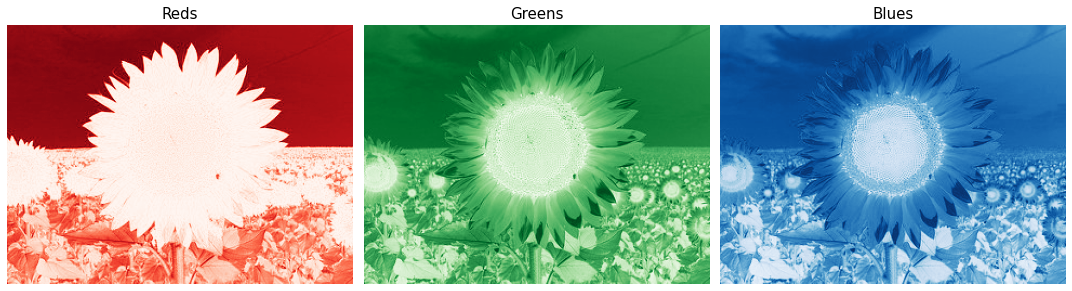

In [ ]:
rgb_splitter(sunflower[0])

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
flower_train = image_dataset_from_directory(data_path,
                                            labels='inferred',
                                            validation_split=0.2,
                                             batch_size=32,
                                            image_size=(150, 150),
                                            subset='training',
                                            seed=123)

Found 3714 files belonging to 5 classes.
Using 2972 files for training.


In [ ]:
flower_validation = image_dataset_from_directory(data_path,
                                            labels='inferred',
                                            validation_split=0.2,
                                            batch_size=32,
                                            image_size=(150, 150),
                                            subset='validation',
                                            seed=123)

Found 3714 files belonging to 5 classes.
Using 742 files for validation.


In [ ]:
class_names = flower_train.class_names
print("Number of Class names :", len(class_names))
print(class_names)

Number of Class names : 5
['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [ ]:
for image_batch , labels_batch in flower_train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 150, 150, 3)
(32,)


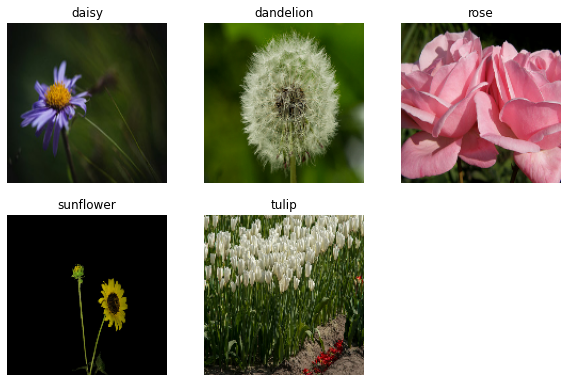

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(len(class_names)):
    filtered_ds = flower_train.filter(lambda x, l: tf.math.equal(l[0], i))
    for image, label in filtered_ds.take(1):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[0].numpy().astype('uint8'))
        plt.title(class_names[label.numpy()[0]])
        plt.axis('off')

In [ ]:
from tensorflow.keras import layers

Learnig using Resnet50

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(150,150,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512))
resnet_model.add(Activation('relu'))
resnet_model.add(Dense(5))
resnet_model.add(Activation('softmax'))

In [ ]:
resnet_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               1049088   
                                                                 
 activation_8 (Activation)   (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 5)                 2565      
                                                                 
 activation_9 (Activation)   (None, 5)                 0         
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
N

In [ ]:
resnet_model.compile(optimizer='adam',
             loss = 'SparseCategoricalCrossentropy',
             metrics = ['accuracy'])

In [ ]:
epochs = 20
history = resnet_model.fit(
  flower_train,
  validation_data=flower_validation,
  epochs=epochs
)

Epoch 1/20
93/93 [==============================] - 20s 170ms/step - loss: 0.7166 - accuracy: 0.7685 - val_loss: 0.4802 - val_accuracy: 0.8275
Epoch 2/20
93/93 [==============================] - 16s 160ms/step - loss: 0.2931 - accuracy: 0.8997 - val_loss: 0.3619 - val_accuracy: 0.8706
Epoch 3/20
93/93 [==============================] - 15s 159ms/step - loss: 0.1598 - accuracy: 0.9515 - val_loss: 0.3281 - val_accuracy: 0.8854
Epoch 4/20
93/93 [==============================] - 15s 157ms/step - loss: 0.0887 - accuracy: 0.9754 - val_loss: 0.3883 - val_accuracy: 0.8774
Epoch 5/20
93/93 [==============================] - 15s 157ms/step - loss: 0.0533 - accuracy: 0.9896 - val_loss: 0.4259 - val_accuracy: 0.8854
Epoch 6/20
93/93 [==============================] - 15s 156ms/step - loss: 0.0276 - accuracy: 0.9966 - val_loss: 0.3863 - val_accuracy: 0.8881
Epoch 7/20
93/93 [==============================] - 16s 162ms/step - loss: 0.0177 - accuracy: 0.9980 - val_loss: 0.4209 - val_accuracy: 0.8827

In [ ]:
import plotly.express as px
model_metrics = history.history

In [ ]:
import pandas as pd
Resnet50 = pd.DataFrame(range(1,21), columns=['Epochs'])

In [ ]:
model_metrics.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
Resnet50['loss'] = model_metrics['loss']
Resnet50['accuracy'] = model_metrics['accuracy']
Resnet50['val_loss'] = model_metrics['val_loss']
Resnet50['val_accuracy'] = model_metrics['val_accuracy']

In [ ]:
Resnet50.head()

,Epochs,loss,accuracy,val_loss,val_accuracy
0,1,0.716628,0.768506,0.480200,0.827493
1,2,0.293143,0.899731,0.361926,0.870620
2,3,0.159752,0.951548,0.328139,0.885445
3,4,0.088676,0.975437,0.388306,0.877358
4,5,0.053277,0.989569,0.425935,0.885445


In [ ]:
fig_acc = px.line(Resnet50,x='Epochs',y='accuracy',template='ggplot2',labels={'accuracy':'Training Accuracy'})
fig_acc.add_scatter(x=Resnet50['Epochs'],y=Resnet50['val_accuracy'],mode='lines',name='Validation accuracy')

In [ ]:
fig_acc = px.line(Resnet50,x='Epochs',y='loss',template='ggplot2',labels={'loss':'Training Loss'})
fig_acc.add_scatter(x=Resnet50['Epochs'],y=Resnet50['val_loss'],mode='lines',name='Validation Loss')